# Este modelo foi feito com o dados CarPrice_Assignment.csv

    No decorrer dese codigo irei repetir algumas vezes as bibliotecas usadas para que não seja necessario ir até o topo do program para vefificar qual biblioteca eu usei.
    E o modelo se baseia em descobrir qual é a caracteristica(Variavel) que mais influencia no preço do carro  segundo os dados importados.

In [22]:
# INSTALAÇÃO DE BIBLIOTECAS  
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import plotly.graph_objects as go
import statsmodels.formula.api as smf


In [2]:
# Função para codificar variáveis categóricas
def encode_categorical_features(data, columns):
    le = LabelEncoder()
    for column in columns:
        data[column] = le.fit_transform(data[column])
    return data

In [3]:
# Função para normalizar os dados
def normalize_data(data):
    scaler = MinMaxScaler()
    return pd.DataFrame(scaler.fit_transform(data), index=data.index, columns=data.columns)

In [4]:
# Função para ajustar e resumir o modelo
def fit_and_summarize_model(formula, data):
    model = smf.ols(formula=formula, data=data).fit()
    print(model.summary())

In [8]:
# Carregar e preparar os dados
carro = pd.read_csv("C:\PROJETOS\Portifolio GIHUB\Dados\CarPrice_Assignment.csv")

In [11]:
# NOMEAÇÃO DAS COLUNAS A SEREM CATECORIZADAS
categorical_columns = ["CarName", "fueltype", "aspiration", "doornumber", "carbody",
                       "drivewheel", "enginelocation", "fuelsystem", "enginetype", "cylindernumber"]
carro = encode_categorical_features(carro, categorical_columns)
carro_norm = normalize_data(carro)

<Axes: xlabel='price', ylabel='Count'>

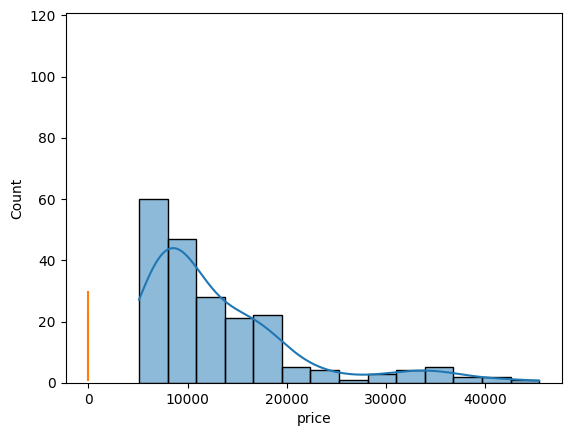

In [12]:
# Visualização inicial
sns.histplot(carro, x="price", kde=True)
sns.histplot(carro, x="doornumber", kde=True)

Cada string na lista formulas representa uma fórmula de regressão diferente.
O formato variável_dependente ~ variável_independente1 + variável_independente2 + ... é comum em linguagens estatísticas como R e é usado aqui para especificar os modelos.

price é a variável dependente (o que estamos tentando prever) em todos os modelos.

As variáveis à direita do ~ são as variáveis independentes (preditores).

Diferenças entre as Fórmulas

A primeira fórmula inclui todas as variáveis disponíveis.
A segunda fórmula remove algumas variáveis (por exemplo, symboling, fueltype, carlength, cylindernumber, fuelsystem, citympg).
A terceira fórmula remove ainda mais variáveis e adiciona -1 ao final, o que significa que o modelo será ajustado sem um termo de intercepto.

In [13]:
# Ajustar modelos de regressão
formulas = [
    'price~symboling+CarName+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg',
    'price~CarName+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm+highwaympg',
    'price~CarName+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm-1'
]

for formula in formulas:
    fit_and_summarize_model(formula, carro_norm)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     66.24
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           2.26e-76
Time:                        13:51:02   Log-Likelihood:                 275.56
No. Observations:                 205   AIC:                            -501.1
Df Residuals:                     180   BIC:                            -418.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1177      0.191  

# OBSERVAÇÃO IMPORTANTE

    Sei que é uma obrigação entender e saber oque cada pedaço do codigo nos traz mas como essa isso esta em uma sessão do git publica e pode servir de lembrete ou instrução não é mesmo então segue a explicação basica de comos se interpreta o  OLS Regression Results .

In [ ]:
# Informações Gerais do Modelo não rodar como codigo

Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     66.24
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           2.26e-76
Time:                        13:51:02   Log-Likelihood:                 275.56
No. Observations:                 205   AIC:                            -501.1
Df Residuals:                     180   BIC:                            -418.1
Df Model:                          24                                         
Covariance Type:            nonrobust  



Dep. Variable: A variável dependente é "price" (preço).
Model: OLS significa Ordinary Least Squares (Mínimos Quadrados Ordinários).
R-squared: 0.898 significa que 89.8% da variabilidade no preço é explicada pelo modelo.
Adj. R-squared: 0.885 é o R² ajustado, que leva em conta o número de preditores.
F-statistic: 66.24 é usado para testar a significância geral do modelo.
Prob (F-statistic): 2.26e-76 é extremamente baixo, indicando que o modelo é estatisticamente significativo.
No. Observations: 205 observações foram usadas no modelo.
Df Residuals: 180 graus de liberdade para os resíduos.
Df Model: 24 graus de liberdade para o modelo (número de preditores).

In [ ]:
Coeficientes e Estatísticas

                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1177      0.191     -0.617      0.538      -0.494       0.259
symboling            0.0081      0.032      0.253      0.801      -0.055       0.071
CarName             -0.1177      0.021     -5.653      0.000      -0.159      -0.077
fueltype             0.0202      0.162      0.124      0.901      -0.300       0.340
aspiration           0.0164      0.022      0.734      0.464      -0.028       0.060
doornumber          -0.0206      0.016     -1.292      0.198      -0.052       0.011
carbody             -0.0914      0.037     -2.489      0.014      -0.164      -0.019
drivewheel           0.0478      0.027      1.756      0.081      -0.006       0.101
enginelocation       0.2742      0.052      5.292      0.000       0.172       0.376
wheelbase            0.0981      0.089      1.107      0.270      -0.077       0.273
carlength           -0.0277      0.088     -0.315      0.753      -0.201       0.146


Para cada variável:

coef: O coeficiente estimado.
std err: O erro padrão do coeficiente.
t: O valor t para testar se o coeficiente é significativamente diferente de zero.
P>|t|: O p-valor associado ao teste t.

In [ ]:
# Interpretação dos Resultados

Significância do Modelo: O modelo como um todo é altamente significativo (p-valor muito baixo para F-statistic).


Qualidade do Ajuste: O R² de 0.898 indica um bom ajuste, explicando 89.8% da variância no preço.


Variáveis Significativas:

"CarName" (p-valor 0.000)
"carbody" (p-valor 0.014)
"enginelocation" (p-valor 0.000)
Estas variáveis são estatisticamente significativas ao nível de 5%.



Variáveis Não Significativas: Muitas variáveis, como "symboling", "fueltype", "aspiration", não são estatisticamente significativas (p-valores altos).


Interpretação dos Coeficientes:

Por exemplo, "enginelocation" tem um coeficiente de 0.2742, indicando um efeito positivo substancial no preço.
"CarName" tem um coeficiente negativo (-0.1177), sugerindo que certas marcas estão associadas a preços mais baixos.



Multicolinearidade: A presença de muitas variáveis não significativas pode sugerir multicolinearidade ou overfitting.

# Conclusão

Este modelo explica bem a variação nos preços dos carros (R² alto), mas muitas variáveis individuais não são significativas. Isso pode indicar que o modelo está sobreajustado ou que há multicolinearidade entre as variáveis preditoras. Pode ser benéfico considerar uma seleção de variáveis mais parcimoniosa ou técnicas de regularização para melhorar o modelo.

# Agora podemos continuar com a preparação dos dados

In [14]:
# Preparar dados para treino e teste
features = ["CarName", "doornumber", "carbody", "drivewheel", "enginelocation", "carwidth", "carheight",
            "curbweight", "enginesize", "stroke", "compressionratio", "horsepower", "peakrpm"]
x = carro_norm[features]
y = carro_norm[["price"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [15]:
# Treinar modelo de regressão linear
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [16]:
# Avaliar o modelo
r = lr.score(x_test, y_test)
print(f"R²: {r}")

y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

print("Treino - MAE:", metrics.mean_absolute_error(y_train, y_pred_train))
print("Treino - MSE:", metrics.mean_squared_error(y_train, y_pred_train))
print("Teste - MAE:", metrics.mean_absolute_error(y_test, y_pred_test))
print("Teste - MSE:", metrics.mean_squared_error(y_test, y_pred_test))

R²: 0.8303187379011615
Treino - MAE: 0.044923885812998214
Treino - MSE: 0.003310072707494447
Teste - MAE: 0.06119306028465088
Teste - MSE: 0.008095516703460289


In [19]:
# Visualização interativa dos resultados
fig = px.scatter(x=y_test.values.flatten(), y=y_pred_test.flatten(),
                 labels={'x': 'Valores Reais', 'y': 'Valores Preditos'},
                 title='Comparação entre Valores Reais e Preditos')
fig.add_shape(type="line", x0=y_test.min().values[0], y0=y_test.min().values[0],
              x1=y_test.max().values[0], y1=y_test.max().values[0],
              line=dict(color="Red",), xref='x', yref='y')
fig.show()

print("Teste - MAE:", metrics.mean_absolute_error(y_test, y_pred_test))
print("Teste - MSE:", metrics.mean_squared_error(y_test, y_pred_test))

Teste - MAE: 0.06119306028465088
Teste - MSE: 0.008095516703460289


In [23]:
# Criar gráfico de dispersão com Plotly
fig = go.Figure()

# Adicionar os valores reais
fig.add_trace(go.Scatter(x=y_test.index, y=y_test.values.flatten(),
                         mode='markers', name='Valores Reais',
                         marker=dict(color='blue')))

# Adicionar os valores preditos
fig.add_trace(go.Scatter(x=y_test.index, y=y_pred_test.flatten(),
                         mode='markers', name='Valores Preditos',
                         marker=dict(color='orange')))

# Ajustar layout do gráfico
fig.update_layout(title='Comparação entre Valores Reais e Preditos',
                  xaxis_title='Índice',
                  yaxis_title='Preço Normalizado',
                  legend_title='Legenda')

fig.show()

print("Teste - MAE:", metrics.mean_absolute_error(y_test, y_pred_test))
print("Teste - MSE:", metrics.mean_squared_error(y_test, y_pred_test))

Teste - MAE: 0.06119306028465088
Teste - MSE: 0.008095516703460289


# Visualização do resultado do modelo

Para exibir a importância das variáveis em um modelo de regressão linear múltipla, existem várias abordagens podemos usar. Aqui esta algumasdas técnicas mais comuns e como implementá-las usando Python.

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import plotly.graph_objects as go
import statsmodels.formula.api as smf
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Esta sessão adicionará quatro novas visualizações:
    Essas visualizações nos ajuda a entender melhor quais variáveis são mais importantes para o modelo de regressão linear.
    Devemos sempre nos lembrar de que diferentes métodos podem dar resultados ligeiramente diferentes, então é útil comparar varios deles.
    

In [28]:
# 1. Coeficientes Padronizados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
lr_scaled = LinearRegression()
lr_scaled.fit(X_scaled, y)

LinearRegression()

Este gráfico de barras mostra a importância das variáveis baseada nos coeficientes padronizados.

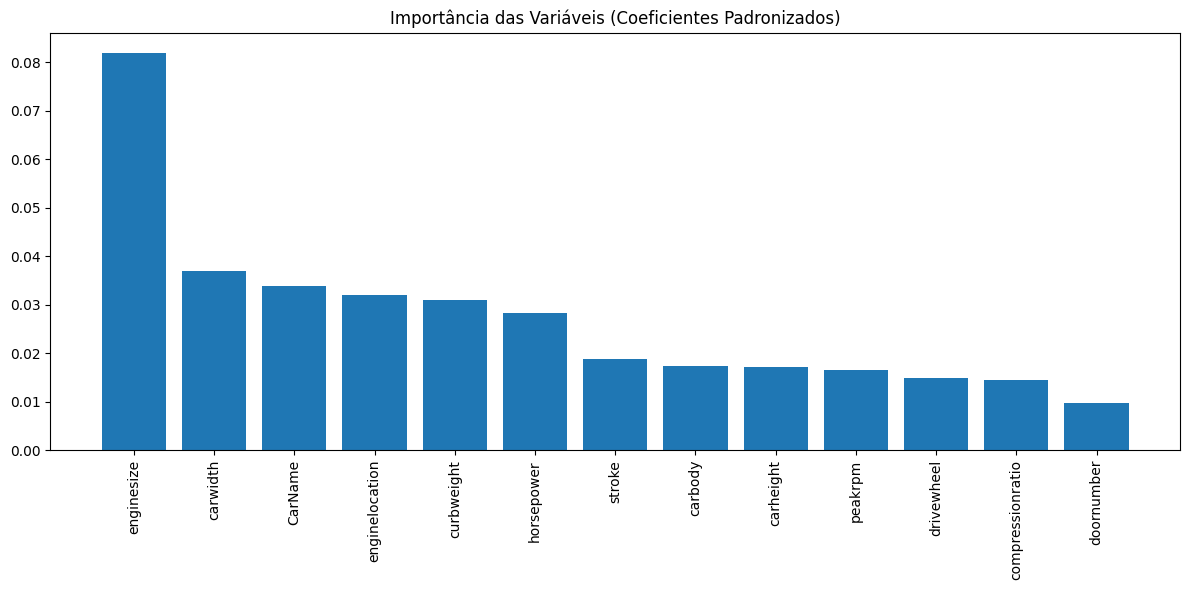

In [29]:
importance = np.abs(lr_scaled.coef_[0])
importance_df = pd.DataFrame({'feature': features, 'importance': importance})
importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(importance_df['feature'], importance_df['importance'])
plt.xticks(rotation=90)
plt.title('Importância das Variáveis (Coeficientes Padronizados)')
plt.tight_layout()
plt.show()

Este gráfico de barras mostra a importância das variáveis baseada na permutation importance.

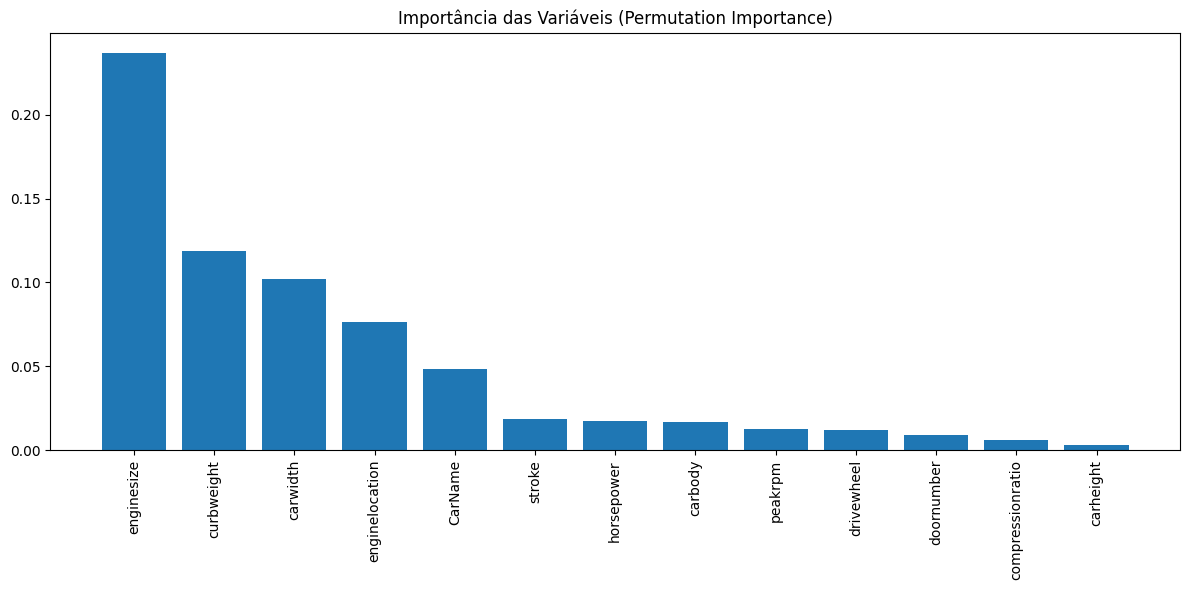

In [30]:
# 2. Permutation Importance
result = permutation_importance(lr, x, y, n_repeats=10, random_state=42)
perm_importance_df = pd.DataFrame({
    'feature': features,
    'importance': result.importances_mean
})
perm_importance_df = perm_importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(perm_importance_df['feature'], perm_importance_df['importance'])
plt.xticks(rotation=90)
plt.title('Importância das Variáveis (Permutation Importance)')
plt.tight_layout()
plt.show()

Este gráfico de barras mostra a correlação absoluta de cada variável com a variável dependente.

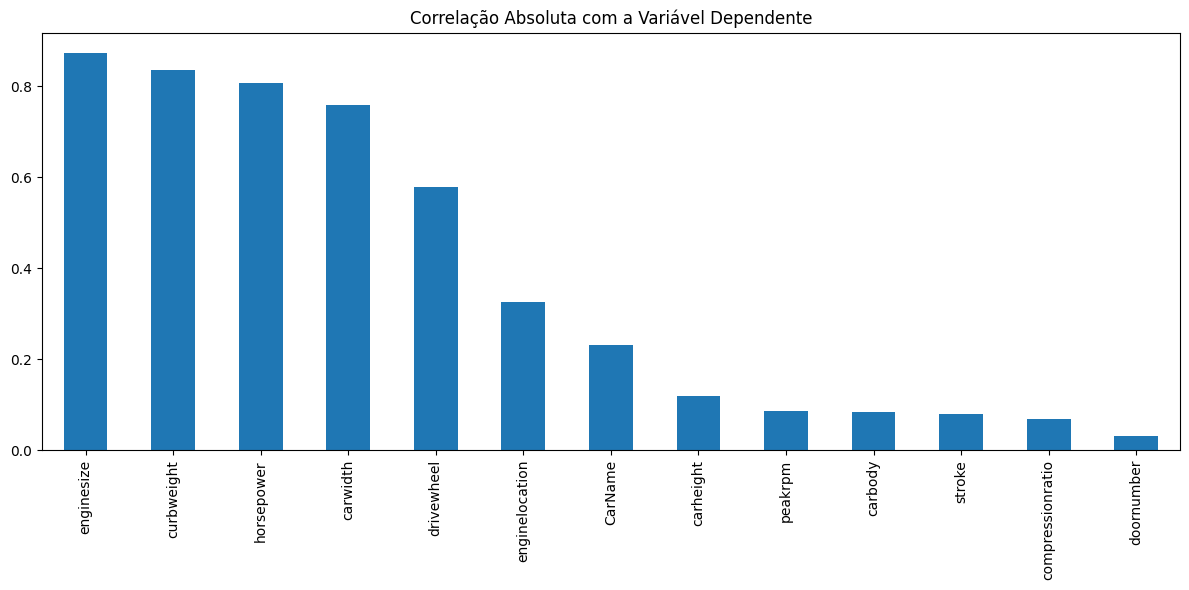

In [31]:
# 3. Correlação com a Variável Dependente
correlations = x.corrwith(y['price']).abs().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
correlations.plot(kind='bar')
plt.title('Correlação Absoluta com a Variável Dependente')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

E este gráfico interativo do Plotly que combina os três métodos acima em um único gráfico para fácil comparação.
O gráfico interativo do Plotly permite uma comparação fácil entre os três métodos, o que pode ser particularmente útil para identificar variáveis que são consistentemente importantes em todos os métodos.

In [32]:
# 4. Gráfico de Importância Combinada usando Plotly
fig = go.Figure()

# Adicionar barras para cada método
fig.add_trace(go.Bar(x=importance_df['feature'], y=importance_df['importance'],
                     name='Coeficientes Padronizados'))
fig.add_trace(go.Bar(x=perm_importance_df['feature'], y=perm_importance_df['importance'],
                     name='Permutation Importance'))
fig.add_trace(go.Bar(x=correlations.index, y=correlations.values,
                     name='Correlação Absoluta'))

In [ ]:
# Atualizar o layout
fig.update_layout(
    title='Comparação de Métodos de Importância de Variáveis',
    xaxis_title='Variáveis',
    yaxis_title='Importância',
    barmode='group',
    xaxis_tickangle=-45
)

fig.show()

In [33]:
# Continua com o restante do seu código...
print("Teste - MAE:", metrics.mean_absolute_error(y_test, y_pred_test))
print("Teste - MSE:", metrics.mean_squared_error(y_test, y_pred_test))

Teste - MAE: 0.06119306028465088
Teste - MSE: 0.008095516703460289
